In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl
import seaborn as sns
from sklearn.linear_model import LinearRegression
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
from sklearn.externals import joblib

In [2]:
df=pd.read_excel('startup.xlsx')

In [3]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


(array([5., 0., 1., 3., 3., 1., 2., 1., 1., 6., 2., 6., 0., 3., 2., 2., 0.,
        1., 3., 2., 1., 2., 0., 1., 2.]),
 array([     0.   ,   6613.968,  13227.936,  19841.904,  26455.872,
         33069.84 ,  39683.808,  46297.776,  52911.744,  59525.712,
         66139.68 ,  72753.648,  79367.616,  85981.584,  92595.552,
         99209.52 , 105823.488, 112437.456, 119051.424, 125665.392,
        132279.36 , 138893.328, 145507.296, 152121.264, 158735.232,
        165349.2  ]),
 <a list of 25 Patch objects>)

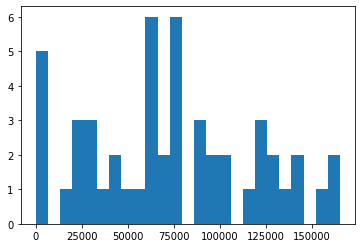

In [4]:
pl.hist(df['R&D Spend'],bins=25)

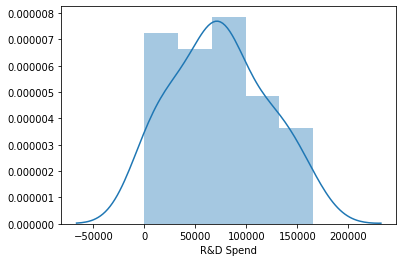

In [5]:
sns.distplot(df['R&D Spend'])

In [6]:
df.columns


Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

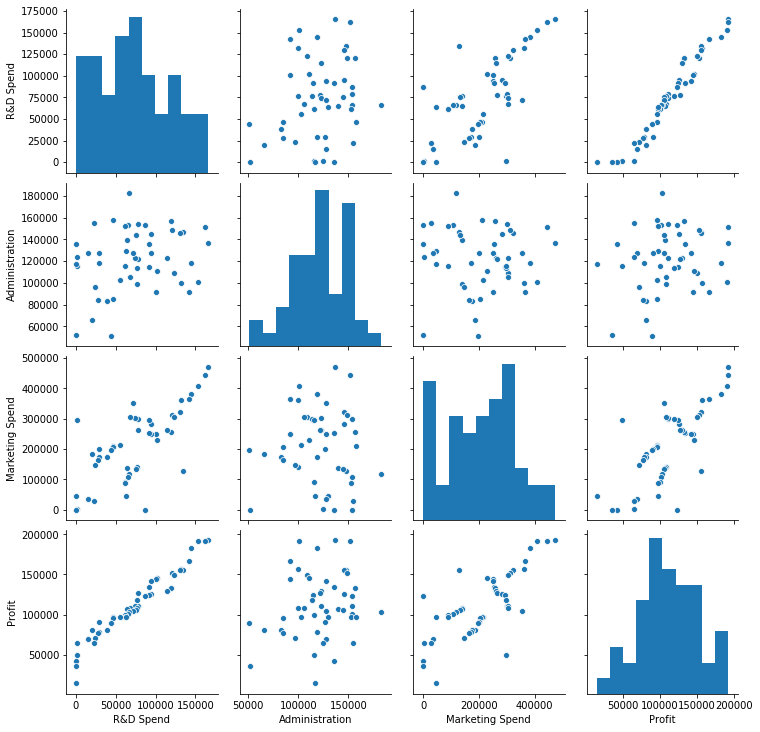

In [7]:
sns.pairplot(df)
pl.show()

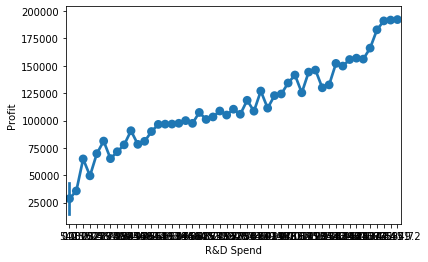

In [8]:
sns.pointplot(data=df,x='R&D Spend',y='Profit')

In [12]:
fig=go.Figure()

In [13]:
fig.add_trace(go.Scatter(x=df['R&D Spend'],y=df['Profit'],mode='lines+markers'))

In [14]:
fig.add_trace(go.Bar(x=df['R&D Spend']))

In [15]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

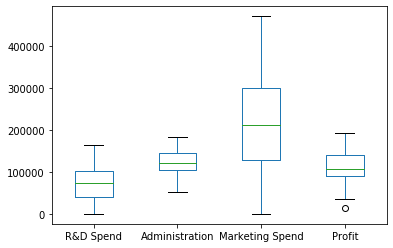

In [19]:
df.plot(kind='box')

In [20]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


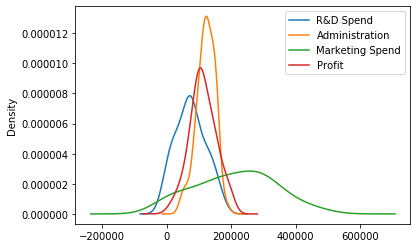

In [24]:
df.plot.density()

In [34]:
df.style.background_gradient()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.200000,136897.800000,471784.100000,New York,192261.830000
1,162597.700000,151377.590000,443898.530000,California,191792.060000
2,153441.510000,101145.550000,407934.540000,Florida,191050.390000
3,144372.410000,118671.850000,383199.620000,New York,182901.990000
4,142107.340000,91391.770000,366168.420000,Florida,166187.940000
5,131876.900000,99814.710000,362861.360000,New York,156991.120000
6,134615.460000,147198.870000,127716.820000,California,156122.510000
7,130298.130000,145530.060000,323876.680000,Florida,155752.600000
8,120542.520000,148718.950000,311613.290000,New York,152211.770000
9,123334.880000,108679.170000,304981.620000,California,149759.960000


In [56]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [57]:
X.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


In [58]:
X=pd.get_dummies(X)

In [60]:
X=X.values

In [63]:
scale=StandardScaler()

In [88]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=0)

In [67]:
X_train=scale.fit_transform(X_train)

In [72]:
X_test=scale.transform(X_test)

In [106]:
linear=LinearRegression().fit(X_train,y_train)

In [107]:
linear.score(X_train,y_train),linear.score(X_test,y_test)

(0.951557126270021, 0.9358680970046518)

In [80]:
cross=KFold(n_splits=10)

In [ ]:
cross.get_n_splits()

In [82]:
linear=LinearRegression()
cl=cross_val_score(linear,X_train,y_train,cv=5)

In [83]:
cross_val_score(linear,X_train,y_train,cv=5)

array([0.81864783, 0.92025779, 0.91427451, 0.82613043, 0.98233304])

In [99]:
from sklearn.pipeline import Pipeline
pipe=Pipeline([('Scaler',StandardScaler()),
               ('linear',LinearRegression())])

In [100]:
pipe.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('Scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [93]:
pipe.score(X_train,y_train),pipe.score(X_test,y_test)

(0.951557126270021, 0.9358680970046518)

In [94]:
cl=cross_val_score(pipe,X_train,y_train,cv=5)

In [101]:
pred=pipe.predict(X_test)

In [102]:
r2_score(y_test,pred)

0.9358680970046518

In [103]:
pd.DataFrame({'Test':y_test,
              'Pred':pred})

,Test,Pred
28,103282.38,104282.764722
11,144259.40,132536.884992
10,146121.95,133910.850078
41,77798.83,72584.774894
2,191050.39,179920.927619
27,105008.31,114549.310792
38,81229.06,66444.432613
31,97483.56,98404.968401
22,110352.25,114499.828086
4,166187.94,169367.506399


In [109]:
joblib.dump(linear,'linear_reg.pkl')

['linear_reg.pkl']